### Importing Libraries

In [25]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV File I/O
import scipy as stats
from scipy.stats import entropy
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Datasets

In [26]:
df_item = pd.read_csv("/Users/azhar/Documents/python learning/pandas_project/Brazillian Ecommerce/olist_order_items_dataset.csv")
df_reviews = pd.read_csv("/Users/azhar/Documents/python learning/pandas_project/Brazillian Ecommerce/olist_order_reviews_dataset.csv")
df_orders = pd.read_csv("/Users/azhar/Documents/python learning/pandas_project/Brazillian Ecommerce/olist_orders_dataset.csv")
df_products = pd.read_csv("/Users/azhar/Documents/python learning/pandas_project/Brazillian Ecommerce/olist_products_dataset.csv")
df_geolocation = pd.read_csv("/Users/azhar/Documents/python learning/pandas_project/Brazillian Ecommerce/Geospatial Analysis/olist_geolocation_dataset.csv")
df_sellers = pd.read_csv("/Users/azhar/Documents/python learning/pandas_project/Brazillian Ecommerce/olist_sellers_dataset.csv")
df_order_pay = pd.read_csv("/Users/azhar/Documents/python learning/pandas_project/Brazillian Ecommerce/olist_order_payments_dataset.csv")
df_customers = pd.read_csv("/Users/azhar/Documents/python learning/pandas_project/Brazillian Ecommerce/olist_customers_dataset.csv")
df_category = pd.read_csv("/Users/azhar/Documents/python learning/pandas_project/Brazillian Ecommerce/product_category_name_translation.csv")

### Merging Datasets

In [27]:
df_train = df_orders.merge(df_item, on='order_id', how='left')
df_train = df_train.merge(df_order_pay, on='order_id', how='outer', validate='m:m')
df_train = df_train.merge(df_reviews, on="order_id", how='outer')
df_train = df_train.merge(df_products, on='product_id', how='outer')
df_train = df_train.merge(df_customers, on='customer_id', how='outer')
df_train = df_train.merge(df_sellers, on='seller_id', how='outer')

print(df_train.shape)

(119143, 39)


### Create Function to Explore Data

In [34]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name', 'dtypes']]
    summary['Missing'] = df.isnull().sum().values
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values
    
    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(entropy(df[name].value_counts(normalize=True), base=2),2)
    return summary
    
def cross_heatmap(df, cols, normalize=False, values=None, aggfunc=None):
    temp = cols
    cm = sns.light_palette('green', as_cmap=True)
    return pd.crosstab(df[temp[0]], df[temp[1]],
                       normalize=normalize, values=values, aggfunc=aggfunc).style.background_gradient(cmap = cm)

In [35]:
resumetable(df_train)

Dataset Shape: (119143, 39)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,order_id,object,0,99441,d455a8cb295653b55abda06d434ab492,7f39ba4c9052be115350065d07583cac,9dc8d1a6f16f1b89874c29c9d8d30447,16.46
1,customer_id,object,0,99441,944b72539d7e1f7f7fc6e46639ef1fe3,d7fc82cbeafea77bd0a8fbbf6296e387,d9442164acf4b03109425633efaa0cfc,16.46
2,order_status,object,0,8,delivered,delivered,delivered,0.25
3,order_purchase_timestamp,object,0,98875,2017-09-26 22:17:05,2017-10-18 08:16:34,2017-10-12 13:33:22,16.44
4,order_approved_at,object,177,90733,2017-09-27 22:24:16,2017-10-18 23:56:20,2017-10-12 13:49:22,16.28
5,order_delivered_carrier_date,object,2086,81018,2017-09-29 15:53:03,2017-10-20 14:29:01,2017-10-17 15:42:42,16.03
6,order_delivered_customer_date,object,3421,95664,2017-10-07 16:12:47,2017-10-27 16:46:05,2017-10-24 20:17:44,16.40
7,order_estimated_delivery_date,object,0,459,2017-10-30 00:00:00,2017-11-09 00:00:00,2017-11-06 00:00:00,8.47
8,order_item_id,float64,833,21,1.0,1.0,1.0,0.72
9,product_id,object,833,32951,a2ff5a97bf95719e38ea2e3b4105bce8,a2ff5a97bf95719e38ea2e3b4105bce8,a2ff5a97bf95719e38ea2e3b4105bce8,13.63


### Only to organize the work, i will get cols by their possible types

In [59]:
df_train.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'price_log', 'cust_Region', 'ord_new'],
      dtype='object')

In [71]:
id_cols = ['order_id', 'seller_id', 'customer_id', 'order_item_id', 'product_id',
           'review_id', 'customer_unique_id', 'seller_zip_code_prefix']

# categorical columns
cat_cols = df_train.nunique()[df_train.nunique() <= 27].keys().tolist()
# cat_cols = [x for x in cat_cols if x not in target_col]

# numerical columns
num_cols = [x for x in df_train.columns if x not in cat_cols + id_cols]

# Binary columns with 2 values
bin_cols = df_train.nunique()[df_train.nunique() == 2].keys().tolist()

# Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

### Stating EDA:

## Price Distribution
Almost always i start by categorical features, but as my aim here is to analyze by a financial bias, i will start understanding the Price distributiions.

/var/folders/49/8m_jrn05797603s8ygxw0j1w0000gn/T/ipykernel_99819/1734774980.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['price'].fillna(-1, inplace=True)
/var/folders/49/8m_jrn05797603s8ygxw0j1w0000gn/T/ipykernel_99819/1734774980.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code

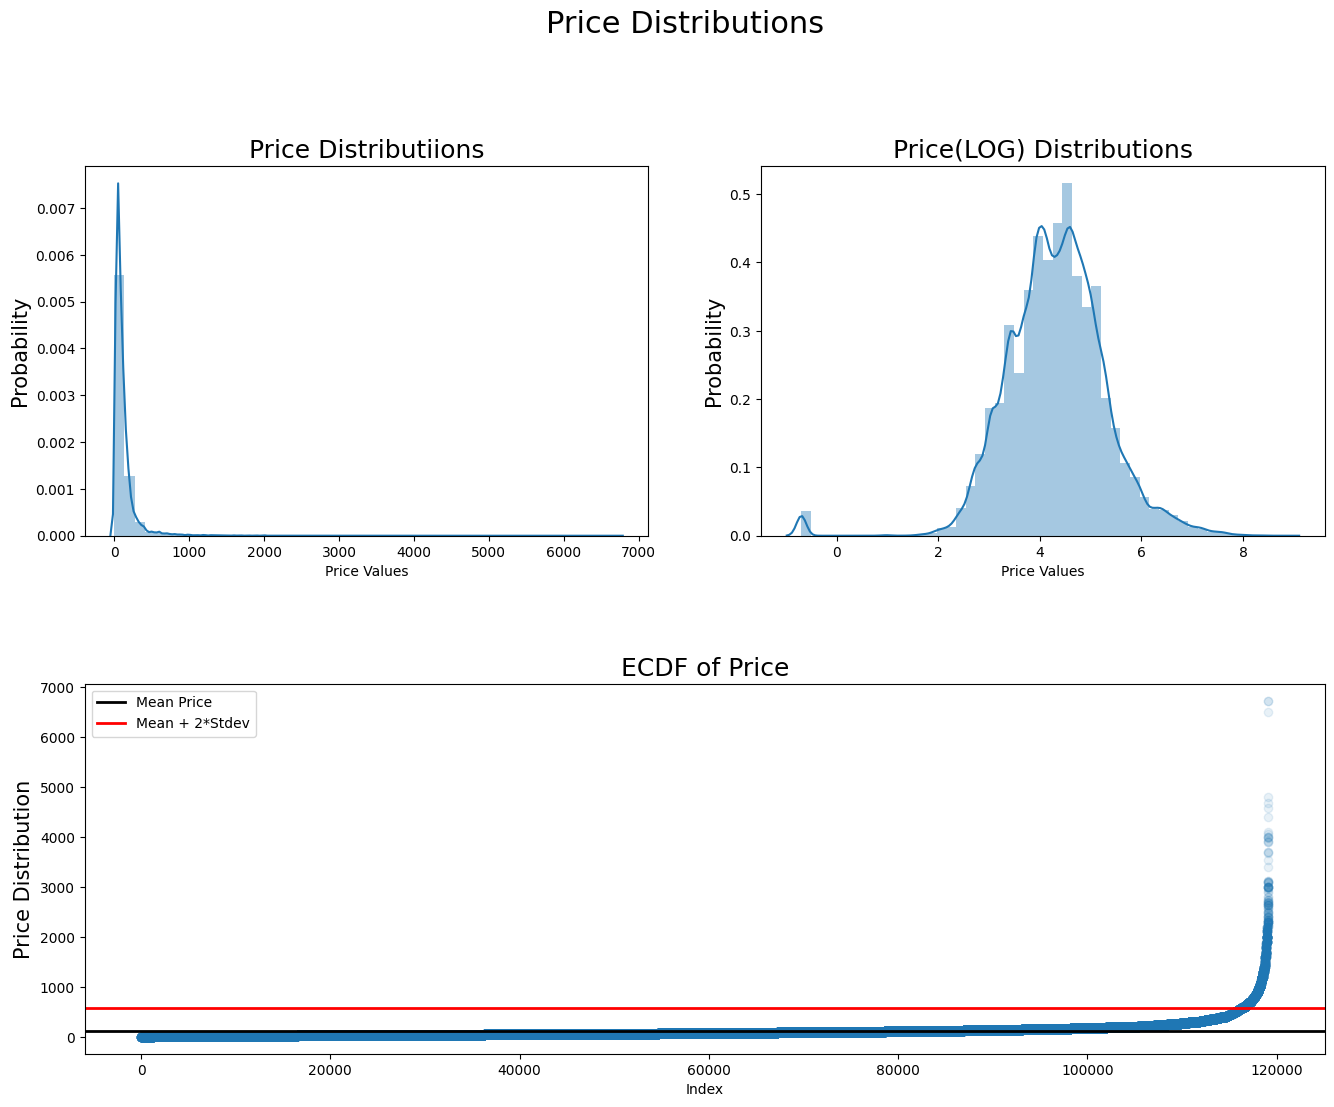

In [41]:
df_train['price'].fillna(-1, inplace=True)

plt.figure(figsize=(16, 12))
plt.suptitle('Price Distributions', fontsize=22)
plt.subplot(221)
g = sns.distplot(df_train['price'])
g.set_title("Price Distributiions", fontsize=18)
g.set_xlabel("Price Values")
g.set_ylabel("Probability", fontsize=15)

plt.subplot(222)
g1 = sns.distplot(np.log(df_train['price'] + 1.5))
g1.set_title("Price(LOG) Distributions", fontsize=18)
g1.set_xlabel("Price Values")
g1.set_ylabel("Probability", fontsize=15)

plt.subplot(212)
g4 = plt.scatter(range(df_train.shape[0]),
                 np.sort(df_train['price'].values),
                 alpha=.1)

g4 = plt.title("ECDF of Price", fontsize=18)
g4 = plt.xlabel("Index")
g4 = plt.ylabel("Price Distribution", fontsize=15)
g4 = plt.axhline(df_train[df_train['price'] != -1]['price'].mean(), color = 'black',
                 label='Mean Price', linewidth=2)
g4 = plt.axhline(df_train[df_train['price'] != -1]['price'].mean() + (2.5 * df_train[df_train['price'] != -1]['price'].std()),
                 color='red',
                 label='Mean + 2*Stdev', linewidth=2)
g4 = plt.legend()

plt.subplots_adjust(hspace = 0.4, top = 0.85)

plt.show()

It gives to us a clearly vision about the price distributions and now we know that.
Mean Value is: 120.65
Standard Deviation is: 184.11

in the graph, i set as outliers all product prices that cross the bound of Mean(120.65) + 2.5x the Stdev(184.11).
The bound to define outliers is BRL 580.92.

## Payment Type

- To start simple, I will start exploring the Most frequent Payment Type
- We also can see the price distributions between

In [73]:
df_train['price_log'] = np.log(df_train['price'] + 1.5)

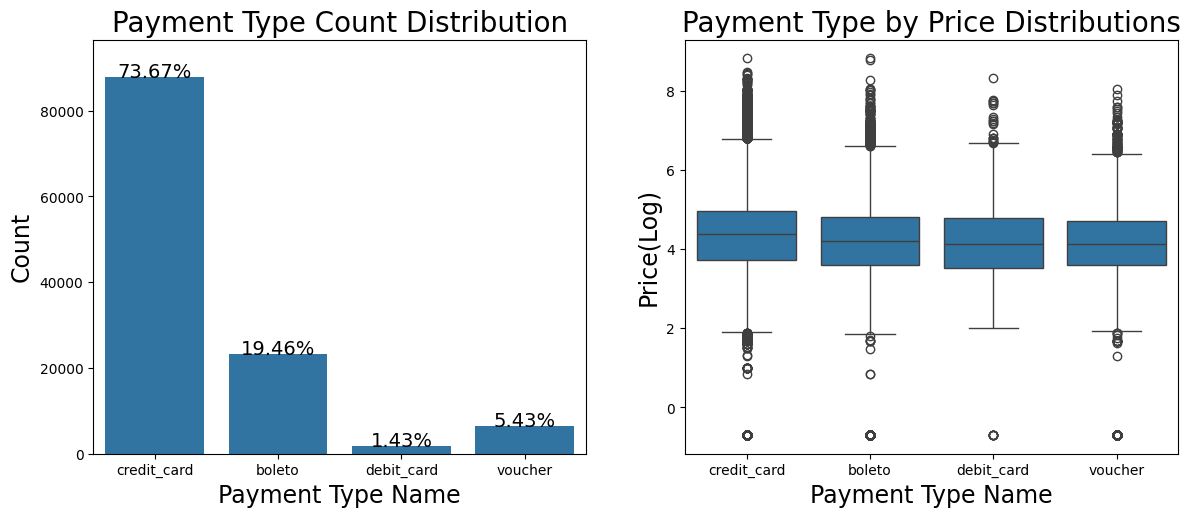

In [45]:
total =len(df_train)

plt.figure(figsize=(14,6))

plt.subplot(121)
g = sns.countplot(x='payment_type', data=df_train[df_train['payment_type'] != 'not_defined'])
g.set_title("Payment Type Count Distribution", fontsize=20)
g.set_xlabel("Payment Type Name", fontsize=17)
g.set_ylabel("Count", fontsize=17)

sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
           height + 3,
           '{:1.2f}%'.format(height/total*100),
           ha="center", fontsize=14)
    
g.set_ylim(0, max(sizes) * 1.1)
    
plt.subplot(122)
g = sns.boxplot(x='payment_type', y='price_log', data=df_train[df_train['payment_type'] != 'not_defined'])
g.set_title("Payment Type by Price Distributions", fontsize=20)
g.set_xlabel("Payment Type Name", fontsize=17)
g.set_ylabel("Price(Log)", fontsize=17)
    
plt.subplots_adjust(hspace = 0.5, top= 0.8)
    
plt.show()

We can see many interesting informations:

- More than 73.5% of all sales are the Payment type is Credit Card.
- Second most common Payment Type is "boleto"(invoice) with almost 19.5%.
- The third more common payment type is voucher with 5.43%.
- We also have some payments from debit card and only 3 sales to not_defined.

## State Features

- I will explore the Customers and sellers states;
- Also, the distribution of price and freight values between states

Customer's:

/var/folders/49/8m_jrn05797603s8ygxw0j1w0000gn/T/ipykernel_99819/1147887826.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45)
/var/folders/49/8m_jrn05797603s8ygxw0j1w0000gn/T/ipykernel_99819/1147887826.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g2.set_xticklabels(g2.get_xticklabels(), rotation=45)
/var/folders/49/8m_jrn05797603s8ygxw0j1w0000gn/T/ipykernel_99819/1147887826.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g3.set_xticklabels(g3.get_xticklabels(), rotation=45)


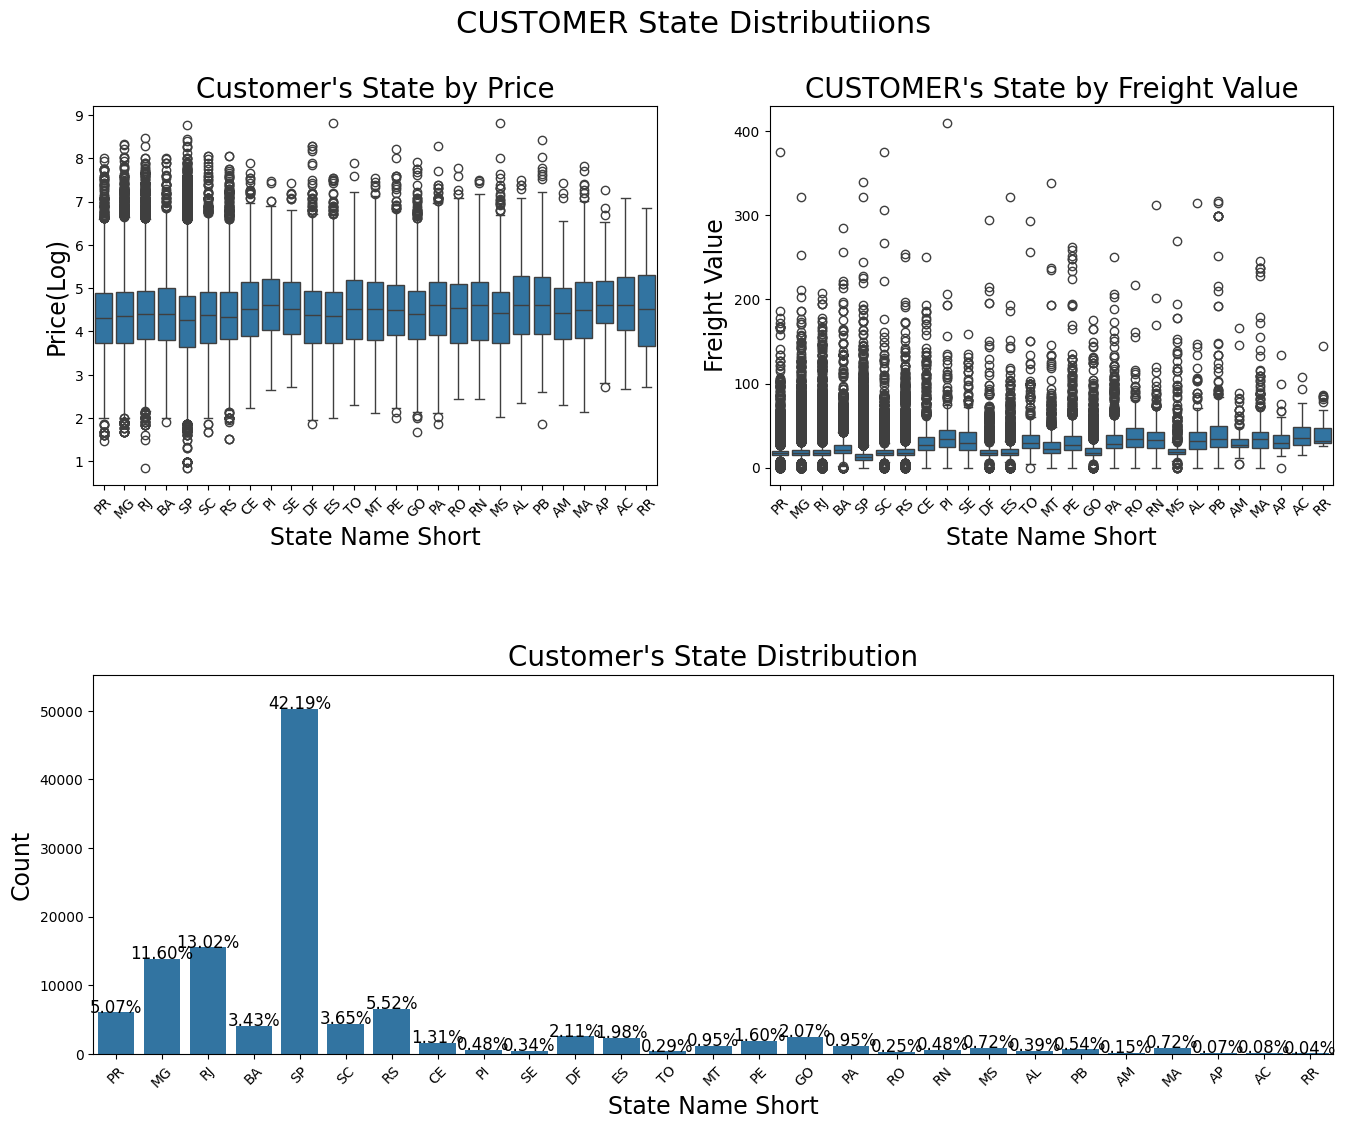

In [46]:
plt.figure(figsize=(16,12))

plt.suptitle('CUSTOMER State Distributiions', fontsize=22)

plt.subplot(212)
g = sns.countplot(x='customer_state', data=df_train, orient='h')
g.set_title("Customer's State Distribution", fontsize=20)
g.set_xlabel("State Name Short", fontsize=17)
g.set_ylabel("Count", fontsize=17)
g.set_xticklabels(g.get_xticklabels(), rotation=45)

sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x() + p.get_width()/2.,
           height + 3, '{:1.2f}%'.format(height/total*100),
           ha='center', fontsize=12)
g.set_ylim(0, max(sizes) * 1.1)

plt.subplot(221)
g2 = sns.boxplot(x='customer_state', y='price_log',
                 data=df_train[df_train['price'] != -1])
g2.set_title("Customer's State by Price", fontsize=20)
g2.set_xlabel("State Name Short", fontsize=17)
g2.set_ylabel("Price(Log)", fontsize=17)
g2.set_xticklabels(g2.get_xticklabels(), rotation=45)

plt.subplot(222)
g3 = sns.boxplot(x='customer_state', y='freight_value',
                 data=df_train[df_train['price'] != -1])
g3.set_title("CUSTOMER's State by Freight Value", fontsize=20)
g3.set_xlabel("State Name Short", fontsize=17)
g3.set_ylabel("Freight Value", fontsize=17)
g3.set_xticklabels(g3.get_xticklabels(), rotation=45)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()

We can see that the most common state of CUSTOMERS is SP(42.19%), followed by RJ(13.02%) and MG(11.6%).

All this states is from the southeast region of Brazil. Also, we have many sales to RS, PR, SC (states from south region).

## Seller's:

/var/folders/49/8m_jrn05797603s8ygxw0j1w0000gn/T/ipykernel_99819/1273558796.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(),rotation=45)
/var/folders/49/8m_jrn05797603s8ygxw0j1w0000gn/T/ipykernel_99819/1273558796.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g2.set_xticklabels(g2.get_xticklabels(),rotation=45)
/var/folders/49/8m_jrn05797603s8ygxw0j1w0000gn/T/ipykernel_99819/1273558796.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g3.set_xticklabels(g3.get_xticklabels(),rotation=45)


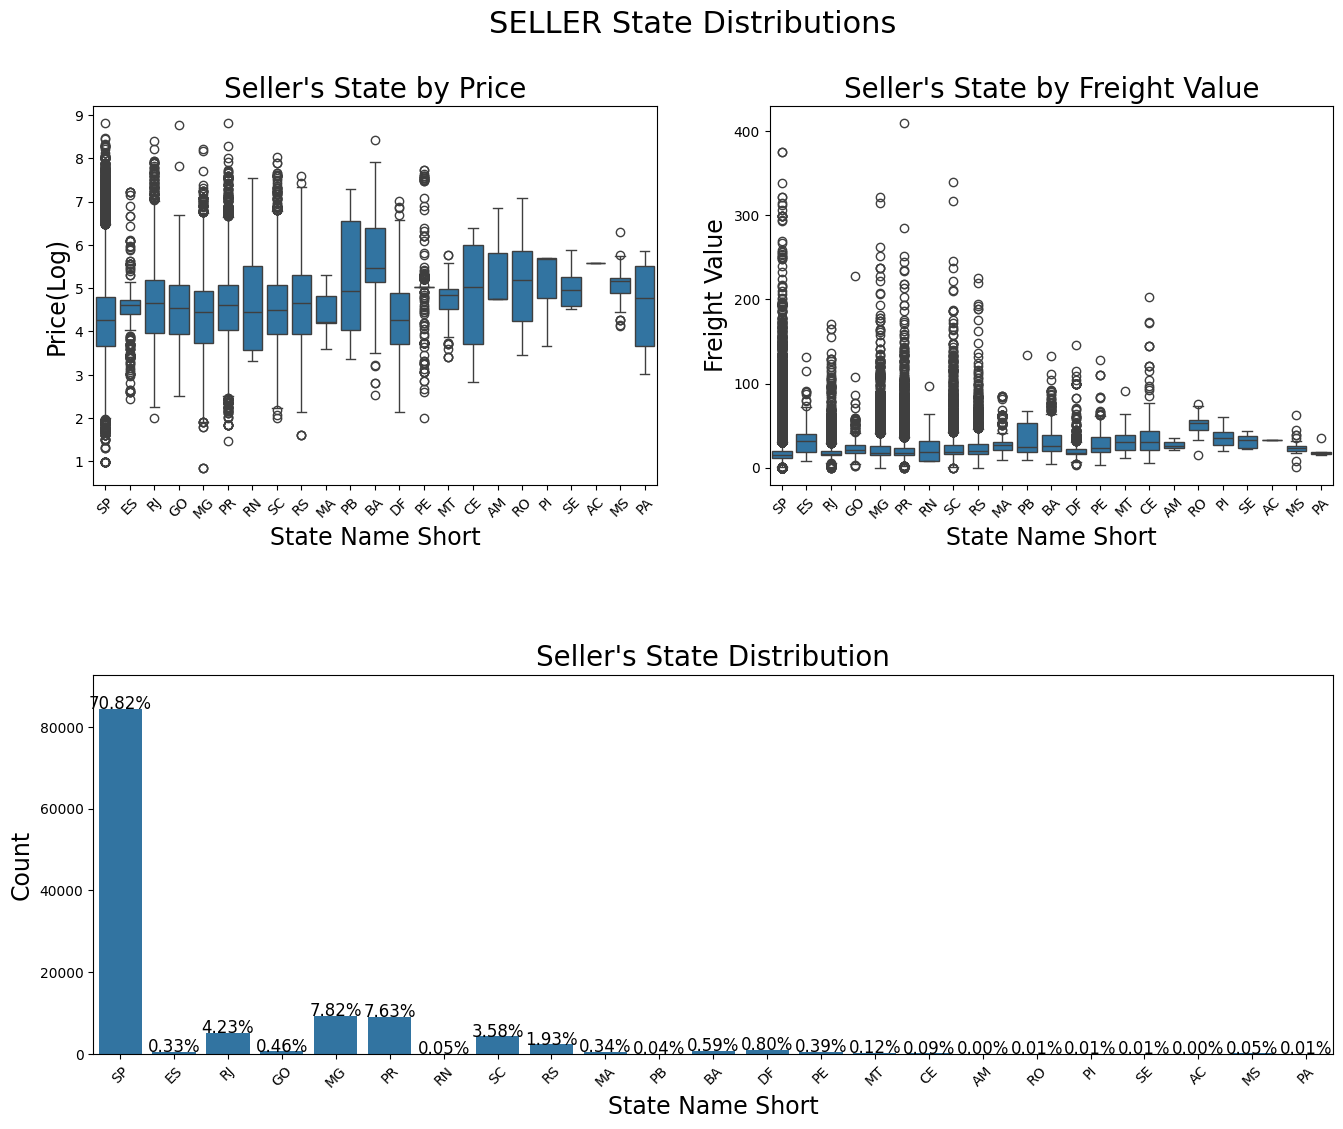

In [47]:
plt.figure(figsize=(16,12))

plt.suptitle('SELLER State Distributions', fontsize=22)

plt.subplot(212)
g = sns.countplot(x='seller_state', data=df_train, orient='h')
g.set_title("Seller's State Distribution", fontsize=20)
g.set_xlabel("State Name Short", fontsize=17)
g.set_ylabel("Count", fontsize=17)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.1)

plt.subplot(221)
g2 = sns.boxplot(x='seller_state', y='price_log', 
                 data=df_train[df_train['price'] != -1])
g2.set_title("Seller's State by Price", fontsize=20)
g2.set_xlabel("State Name Short", fontsize=17)
g2.set_ylabel("Price(Log)", fontsize=17)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)

plt.subplot(222)
g3 = sns.boxplot(x='seller_state', y='freight_value', 
                 data=df_train[df_train['price'] != -1])
g3.set_title("Seller's State by Freight Value", fontsize=20)
g3.set_xlabel("State Name Short", fontsize=17)
g3.set_ylabel("Freight Value", fontsize=17)
g3.set_xticklabels(g3.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()

Different of what we saw in Customer states, sellers have almost 70% of sellers products solds from SP, followed by MG and PR.

## Mean Freight by States

The objective here is to get the mean value when Seller is from X state and Customer from Y State.
- I will select only the more frequent states to a better view

In [48]:
# Setting regions
sudeste = ['SP', 'RJ', 'ES','MG']
nordeste= ['MA', 'PI', 'CE', 'RN', 'PE', 'PB', 'SE', 'AL', 'BA']
norte =  ['AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC']
centro_oeste = ['MT', 'GO', 'MS' ,'DF' ]
sul = ['SC', 'RS', 'PR']

df_train.loc[df_train['customer_state'].isin(sudeste), 'cust_Region'] = 'Southeast'
df_train.loc[df_train['customer_state'].isin(nordeste), 'cust_Region'] = 'Northeast'
df_train.loc[df_train['customer_state'].isin(norte), 'cust_Region'] = 'North'
df_train.loc[df_train['customer_state'].isin(centro_oeste), 'cust_Region'] = 'Midwest'
df_train.loc[df_train['customer_state'].isin(sul), 'cust_Region'] = 'South'




## Freight Value mean from State to Regions

In [50]:
cross_heatmap(df_train[df_train['price'] != -1], ['seller_state', 'cust_Region'],
              values=df_train[df_train['price'] != -1]['freight_value'], aggfunc='mean')

cust_Region,Midwest,North,Northeast,South,Southeast
seller_state,,,,,
AC,nan,nan,nan,nan,32.840000
AM,nan,nan,28.255000,nan,25.290000
BA,29.977381,46.290476,22.736355,39.643671,33.618110
CE,65.456667,85.614000,29.744054,51.445556,47.044130
DF,13.070164,58.371935,27.607364,27.096786,19.636728
ES,36.895833,68.896250,36.664464,39.894510,28.461445
GO,14.686705,26.595909,33.369841,30.535870,24.201088
MA,27.150192,28.859000,19.453333,42.660652,31.880362
MG,26.861624,41.899053,33.968349,28.904398,21.153626


Very interesting distributions.
We can see that:
- SP sellers have a lowest mean of freights to all regions.
- CE sellers have high mean value
- We can note that sellers from southeast could have a better competitive advantage

## Order Item Id
- I think that this column is the total items brought.
- Let's explore the distribution of this feature.

In [52]:
df_train['ord_new'] = df_train['order_item_id'].copy()

df_train.loc[df_train['order_item_id'].isin([7,8,9,10]), 'ord_new'] = '7 to 10'
df_train.loc[(df_train['order_item_id'] > 10), 'ord_new'] = '10 to 20'

/var/folders/49/8m_jrn05797603s8ygxw0j1w0000gn/T/ipykernel_99819/2586852279.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '7 to 10' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_train.loc[df_train['order_item_id'].isin([7,8,9,10]), 'ord_new'] = '7 to 10'


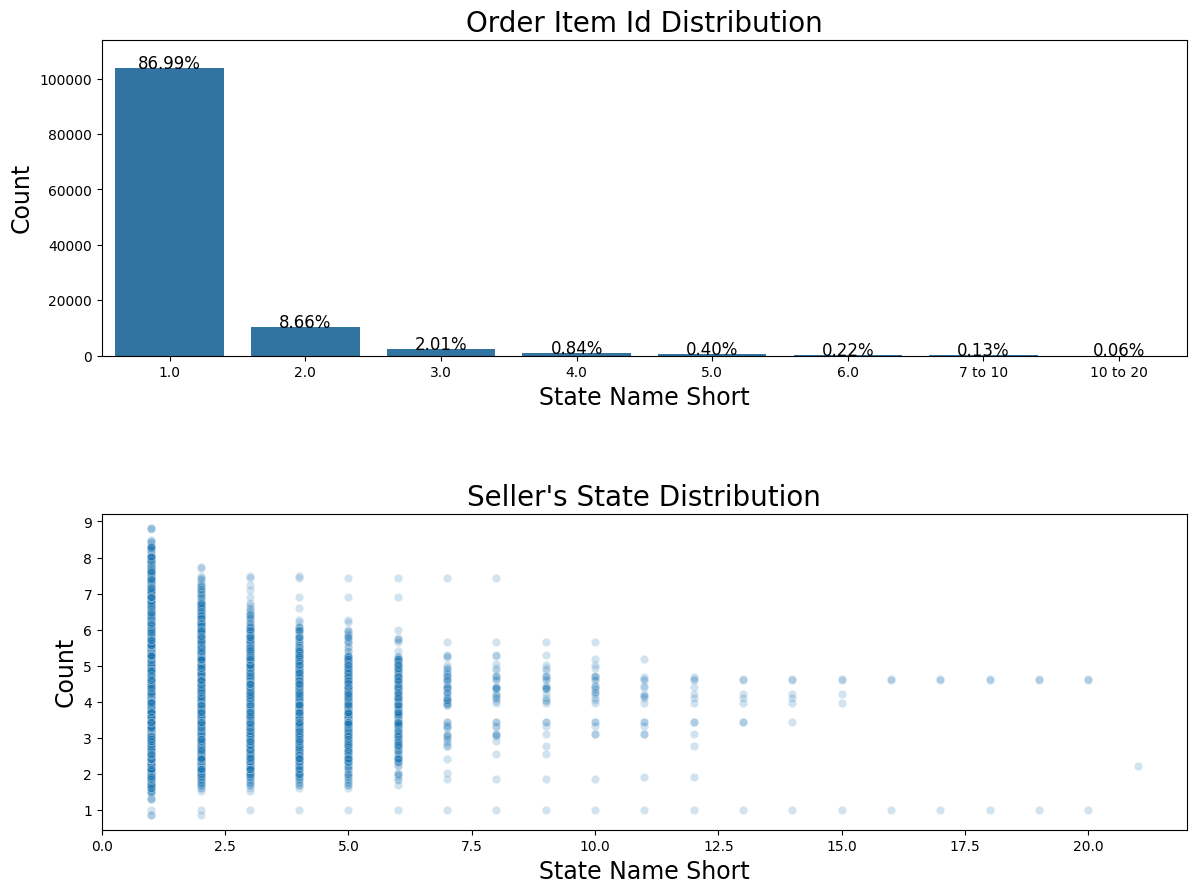

In [53]:
plt.figure(figsize=(14,10))


plt.subplot(211)
g = sns.countplot(x='ord_new', data=df_train)
g.set_title("Order Item Id Distribution", fontsize=20)
g.set_xlabel("State Name Short", fontsize=17)
g.set_ylabel("Count", fontsize=17)
sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.1)

plt.subplot(212)
g1 = sns.scatterplot(x='order_item_id', y='price_log',
                     data=df_train, alpha=.2)
g1.set_title("Seller's State Distribution", fontsize=20)
g1.set_xlabel("State Name Short", fontsize=17)
g1.set_ylabel("Count", fontsize=17)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()

86.99% of items ordered are of only one item? it's long tail case.

## Total items by Review Score

In [55]:
round(pd.crosstab(df_train['order_item_id'], df_train['review_score'], normalize='index') * 100, 2).loc[:12].T

order_item_id,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
review_score,,,,,,,,,,,,
1.0,11.09,21.97,25.60,28.78,29.89,32.95,41.67,41.67,50.00,52.0,47.06,50.00
2.0,3.16,5.73,6.19,6.33,6.02,3.88,3.33,0.00,0.00,0.0,0.00,0.00
3.0,8.25,9.31,9.28,8.98,9.03,10.08,13.33,13.89,14.29,16.0,17.65,8.33
4.0,19.42,16.08,15.85,15.51,16.13,15.89,15.00,19.44,17.86,12.0,17.65,16.67
5.0,58.08,46.91,43.07,40.41,38.92,37.21,26.67,25.00,17.86,20.0,17.65,25.00
